## 1. Importar Bibliotecas Necesarias

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
import seaborn as sns
from scipy import stats
import warnings

warnings.filterwarnings('ignore')

print(F"✅ Versión instalada de Pandas = {pd.__version__}")
print(F"✅ Versión instalada de Numpy = {np.__version__}")
print(F"✅ Versión instalada de Matplotlib = {plt.matplotlib.__version__}")
print(F"✅ Versión instalada de Seaborn = {seaborn.__version__}")


# Configuración para gráficos
plt.style.use('default')
sns.set_palette("husl")

✅ Versión instalada de Pandas = 2.2.2
✅ Versión instalada de Numpy = 1.26.4
✅ Versión instalada de Matplotlib = 3.9.2
✅ Versión instalada de Seaborn = 0.13.2


## 2. Creación de DataFrame con Valores Perdidos


In [22]:
# Crear estructura de datos con valores NaN
data = {
    'Nombre': ['Ana', 'Carlos', 'María', np.nan, 'Sofia'],
    'Edad': [25, np.nan, 30, 28, np.nan],
    'Salario': [50000, 60000, np.nan, 55000, 65000],
    'Departamento': ['IT', 'Ventas', np.nan, 'IT', 'Marketing']
}

# Generar el DataFrame
df = pd.DataFrame(data)
print("DataFrame con valores perdidos:")
print(df)

DataFrame con valores perdidos:
   Nombre  Edad  Salario Departamento
0     Ana  25.0  50000.0           IT
1  Carlos   NaN  60000.0       Ventas
2   María  30.0      NaN          NaN
3     NaN  28.0  55000.0           IT
4   Sofia   NaN  65000.0    Marketing


## 3. Identificación de Valores Perdidos


In [23]:
"""
Detectar datos perdidos:

- df.isnull() nos dice con True o False si falta algo.
- df.isnull().sum() nos cuenta cuántos datos faltan por columna.
- df.isnull().mean() nos dice qué porcentaje está vacío.
- df.notnull() nos dice dónde sí hay datos.
"""
# Verificar valores nulos
print("Valores nulos por columna:")
print("df.isnull():")
print(df.isnull())

print("\nConteo de valores nulos:")
print("df.isnull().sum():")
print(df.isnull().sum())

print("\nPorcentaje de valores nulos:")
print("df.isnull().mean():")
print(df.isnull().mean())

print("\nValores NO nulos:")
print("df.notnull().sum():")
print(df.notnull().sum())

Valores nulos por columna:
df.isnull():
   Nombre   Edad  Salario  Departamento
0   False  False    False         False
1   False   True    False         False
2   False  False     True          True
3    True  False    False         False
4   False   True    False         False

Conteo de valores nulos:
df.isnull().sum():
Nombre          1
Edad            2
Salario         1
Departamento    1
dtype: int64

Porcentaje de valores nulos:
df.isnull().mean():
Nombre          0.2
Edad            0.4
Salario         0.2
Departamento    0.2
dtype: float64

Valores NO nulos:
df.notnull().sum():
Nombre          4
Edad            3
Salario         4
Departamento    4
dtype: int64


## 4. Visualización de Valores Perdidos

In [24]:
"""
Es mucho más fácil ver los problemas con imágenes:

- Mapa de calor: muestra con colores dónde faltan datos.
- Gráfico de barras: muestra qué columnas tienen más huecos.
"""
# Crear un DataFrame más grande para mejor visualización
np.random.seed(42)
data_large = {
    'A': np.random.choice([1, 2, 3, np.nan], 100, p=[0.3, 0.3, 0.3, 0.1]),
    'B': np.random.choice([10, 20, 30, np.nan], 100, p=[0.25, 0.25, 0.25, 0.25]),
    'C': np.random.choice(['X', 'Y', 'Z', np.nan], 100, p=[0.4, 0.3, 0.2, 0.1])
}
df_large = pd.DataFrame(data_large)

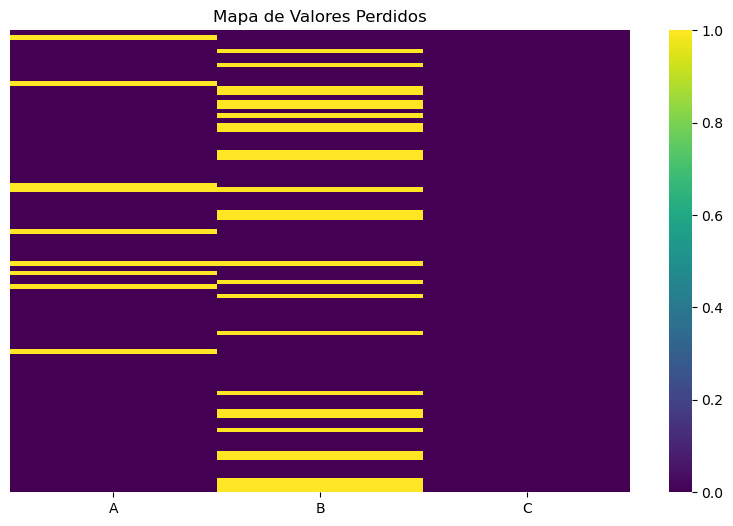

In [25]:
# Visualización con heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df_large.isnull(), cmap='viridis', cbar=True, yticklabels=False)
plt.title('Mapa de Valores Perdidos')
plt.show()

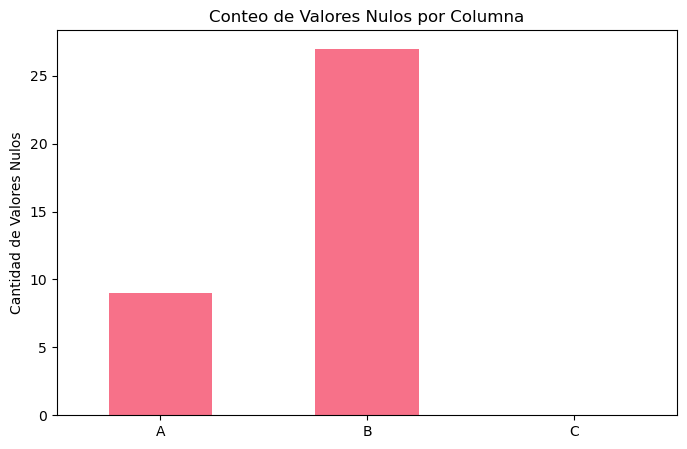

In [26]:
# Gráfico de barras de valores nulos

plt.figure(figsize=(8, 5))
df_large.isnull().sum().plot(kind='bar')
plt.title('Conteo de Valores Nulos por Columna')
plt.ylabel('Cantidad de Valores Nulos')
plt.xticks(rotation=0)
plt.show()

## 5. Filtrado de Datos Perdidos


In [ ]:
"""
A veces, lo más fácil es borrar lo que está incompleto:

- dropna() elimina filas con valores vacíos.
- dropna(axis=1) elimina columnas completas si tienen datos perdidos.
- dropna(thresh=3) mantiene solo filas que tengan al menos 3 datos válidos.
"""
# Crear DataFrame de ejemplo
df_filtro = df.copy()
print("DataFrame original:")
print(df_filtro)

In [ ]:
# Eliminación de filas con valores NaN
print("\nEliminación de filas (dropna):")
df_sin_filas = df_filtro.dropna()
print(df_sin_filas)

In [ ]:
# Eliminación de columnas con valores NaN
print("\nEliminación de columnas (dropna(axis=1)):")
df_sin_columnas = df_filtro.dropna(axis=1)
print(df_sin_columnas)

In [ ]:
# Filtrado condicional - mantener filas con al menos 3 valores no nulos
print("\nFiltrado condicional (thresh=3):")
df_thresh = df_filtro.dropna(thresh=3)
print(df_thresh)

## 6. Imputación con Valores Estadísticos


In [ ]:
"""
Imputar es un término técnico que, en este contexto, significa rellenar o completar un dato que falta.
Y "con valores estadísticos" significa que vamos a usar cálculos como el promedio, la mediana o la moda para decidir con qué valor rellenar esos datos faltantes.

Si no queremos borrar nada, podemos adivinar un valor razonable:

- mean() (promedio): ideal si los datos son parejos.
- median() (valor del medio): mejor si hay números muy altos o bajos que podrían alterar el promedio.
"""

# Crear DataFrame para imputación
df_imputacion = df.copy()
print("DataFrame antes de imputación:")
print(df_imputacion)

In [16]:
# Imputación con la media
print(f"\nMedia de Edad: {df_imputacion['Edad'].mean():.2f}")
df_imputacion['Edad'].fillna(df_imputacion['Edad'].mean(), inplace=True)


Media de Edad: 27.67


In [17]:
# Imputación con la mediana
print(f"Mediana de Salario: {df_imputacion['Salario'].median():.2f}")
df_imputacion['Salario'].fillna(df_imputacion['Salario'].median(), inplace=True)

print("\nDataFrame después de imputación con media y mediana:")
print(df_imputacion)

Mediana de Salario: 57500.00

DataFrame después de imputación con media y mediana:
   Nombre       Edad  Salario Departamento
0     Ana  25.000000  50000.0           IT
1  Carlos  27.666667  60000.0       Ventas
2   María  30.000000  57500.0          NaN
3     NaN  28.000000  55000.0           IT
4   Sofia  27.666667  65000.0    Marketing


## 7. Imputación de Valores Categóricos con la Moda


In [18]:
# Crear DataFrame con más datos categóricos
data_cat = {
    'Producto': ['Laptop', 'Smartphone', np.nan, 'Tablet', 'Laptop', np.nan, 'Laptop'],
    'Marca': ['Apple', np.nan, 'Samsung', 'Apple', np.nan, 'Apple', 'Apple'],
    'Precio': [1200, 800, 600, np.nan, 1300, 900, 1100]
}
df_cat = pd.DataFrame(data_cat)
print("DataFrame categórico original:")
print(df_cat)

# Calcular e imputar con la moda
moda_producto = df_cat['Producto'].mode()[0]
print(f"\nModa de Producto: {moda_producto}")
df_cat['Producto'].fillna(moda_producto, inplace=True)

moda_marca = df_cat['Marca'].mode()[0]
print(f"Moda de Marca: {moda_marca}")
df_cat['Marca'].fillna(moda_marca, inplace=True)

print("\nDataFrame después de imputación con moda:")
print(df_cat)

DataFrame categórico original:
     Producto    Marca  Precio
0      Laptop    Apple  1200.0
1  Smartphone      NaN   800.0
2         NaN  Samsung   600.0
3      Tablet    Apple     NaN
4      Laptop      NaN  1300.0
5         NaN    Apple   900.0
6      Laptop    Apple  1100.0

Moda de Producto: Laptop
Moda de Marca: Apple

DataFrame después de imputación con moda:
     Producto    Marca  Precio
0      Laptop    Apple  1200.0
1  Smartphone    Apple   800.0
2      Laptop  Samsung   600.0
3      Tablet    Apple     NaN
4      Laptop    Apple  1300.0
5      Laptop    Apple   900.0
6      Laptop    Apple  1100.0


## 8. Imputación con Nueva Categoría


In [19]:
# Crear copia para demostrar método alternativo
df_nueva_cat = pd.DataFrame(data_cat)
print("DataFrame original:")
print(df_nueva_cat)

# Imputar con nueva categoría
df_nueva_cat['Producto'].fillna('Desconocido', inplace=True)
df_nueva_cat['Marca'].fillna('No especificado', inplace=True)

print("\nDataFrame con nueva categoría:")
print(df_nueva_cat)

DataFrame original:
     Producto    Marca  Precio
0      Laptop    Apple  1200.0
1  Smartphone      NaN   800.0
2         NaN  Samsung   600.0
3      Tablet    Apple     NaN
4      Laptop      NaN  1300.0
5         NaN    Apple   900.0
6      Laptop    Apple  1100.0

DataFrame con nueva categoría:
      Producto            Marca  Precio
0       Laptop            Apple  1200.0
1   Smartphone  No especificado   800.0
2  Desconocido          Samsung   600.0
3       Tablet            Apple     NaN
4       Laptop  No especificado  1300.0
5  Desconocido            Apple   900.0
6       Laptop            Apple  1100.0


## 9. Imputación Basada en Relaciones con Otras Variables


In [20]:
# Crear DataFrame con relaciones
data_rel = {
    'Departamento': ['IT', 'IT', 'Ventas', 'Ventas', 'Marketing', 'IT', 'Ventas'],
    'Salario': [70000, np.nan, 45000, np.nan, 60000, 75000, np.nan],
    'Experiencia': [5, 3, 2, 4, 6, 7, 1]
}
df_rel = pd.DataFrame(data_rel)
print("DataFrame con relaciones:")
print(df_rel)

# Calcular salario promedio por departamento
salario_por_dept = df_rel.groupby('Departamento')['Salario'].mean()
print(f"\nSalario promedio por departamento:")
print(salario_por_dept)

# Imputar basado en departamento
def imputar_por_grupo(row):
    if pd.isna(row['Salario']):
        return salario_por_dept[row['Departamento']]
    return row['Salario']

df_rel['Salario'] = df_rel.apply(imputar_por_grupo, axis=1)
print(f"\nDataFrame después de imputación por grupo:")
print(df_rel)

DataFrame con relaciones:
  Departamento  Salario  Experiencia
0           IT  70000.0            5
1           IT      NaN            3
2       Ventas  45000.0            2
3       Ventas      NaN            4
4    Marketing  60000.0            6
5           IT  75000.0            7
6       Ventas      NaN            1

Salario promedio por departamento:
Departamento
IT           72500.0
Marketing    60000.0
Ventas       45000.0
Name: Salario, dtype: float64

DataFrame después de imputación por grupo:
  Departamento  Salario  Experiencia
0           IT  70000.0            5
1           IT  72500.0            3
2       Ventas  45000.0            2
3       Ventas  45000.0            4
4    Marketing  60000.0            6
5           IT  75000.0            7
6       Ventas  45000.0            1
